In [31]:
import pandas as pd
%matplotlib inline#화면에 시각화된 결과 바로 띄움
import seaborn as sb#data visualizaition module
import matplotlib.pyplot as plt#data visualizaition module

In [2]:
data = pd.read_excel("C:/Users/User/Documents/카카오톡 받은 파일/Hard1.xlsx",header=0, names=['글자세트', '그림세트','Set','Relation','Response','RT'])

In [3]:
data.head()

,글자세트,그림세트,Set,Relation,Response,RT
0,13,37,1,U,q,0.630571
1,36,7,0,U,r,47.221504
2,14,14,0,R,r,0.895417
3,4,4,1,R,r,0.511395
4,1,1,0,R,r,0.699193


In [4]:
data.shape

(3840, 6)

In [5]:
data.describe()

,글자세트,그림세트,Set,RT
count,3840.0000,3840.0000,3840.000000,3840.000000
mean,20.5000,20.5000,0.500000,0.817836
std,11.5449,11.5449,0.500065,1.076897
min,1.0000,1.0000,0.000000,0.040146
25%,10.7500,10.7500,0.000000,0.461054
50%,20.5000,20.5000,0.500000,0.594002
75%,30.2500,30.2500,1.000000,0.826665
max,40.0000,40.0000,1.000000,47.221504


In [6]:
data['cr']=data['Set']

data.loc[(data["Relation"] == "U") & (data["Response"] == "q"), "cr"] = 1
data.loc[(data["Relation"] == "U") & (data["Response"] == "r"), "cr"] = 0
data.loc[(data["Relation"] == "R") & (data["Response"] == "r"), "cr"] = 1
data.loc[(data["Relation"] == "R") & (data["Response"] == "q"), "cr"] = 0
data

,글자세트,그림세트,Set,Relation,Response,RT,cr
0,13,37,1,U,q,0.630571,1
1,36,7,0,U,r,47.221504,0
2,14,14,0,R,r,0.895417,1
3,4,4,1,R,r,0.511395,1
4,1,1,0,R,r,0.699193,1
...,...,...,...,...,...,...,...
3835,26,4,0,U,q,1.428068,1
3836,30,33,1,U,q,1.684731,1
3837,14,12,1,U,q,2.765056,1
3838,20,20,1,R,r,0.640602,1


In [7]:
data['cr'].unique()

array([1, 0], dtype=int64)

#  
# Data preprocessing &remove outlyer

{'whiskers': [<matplotlib.lines.Line2D at 0x2523e3c7b88>,
 'caps': [<matplotlib.lines.Line2D at 0x2523e3cab48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2523e3bffc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2523e3cfa08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2523e3cffc8>],
 'means': []}

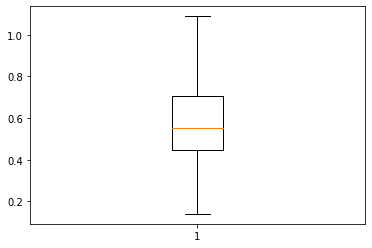

In [52]:
set_0=data[data['Set']==0]
set_0_RT=set_0[(set_0["RT"]<1.09)&(set_0["RT"]>0.041)]
plt.boxplot(set_0_RT['RT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2523cfed848>,
 'caps': [<matplotlib.lines.Line2D at 0x2523cfed0c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2523d2b1688>],
 'medians': [<matplotlib.lines.Line2D at 0x2523d2a1cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2523ca31d08>],
 'means': []}

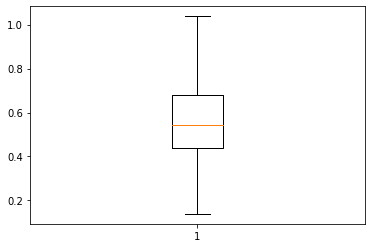

In [55]:
set_1=data[data['Set']==1]
set_1_RT=set_1[(set_1["RT"]<1.04) & (set_1["RT"]>0.000)]
plt.boxplot(set_1_RT['RT'])

#  
# distplot (막대+선)

# 정규분포(가우시안)를 따르면 좋다

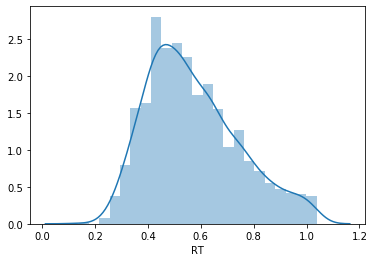

In [30]:
sb.distplot(set_1_RT['RT'])

In [32]:
set_0.shape

(1920, 7)

In [33]:
set_1.shape

(1920, 7)


# Creating mean vector lists

In [38]:
mean_set0=[]
cr_set0=[]
for n in range(1,25):
    tmp=set_0[80*(n-1):80*n]#bundle with outlyer
    bundle=tmp[(tmp['RT']<1.09)&(tmp['RT']>0.041)]
    mean=bundle['RT'].mean()
    mean_set0.append(mean)
    cr=bundle['cr'].sum()/len(bundle['RT'])
    cr_set0.append(cr)

mean_set0

[0.6688407644067842,
 0.6636833171864964,
 0.705712554386082,
 0.583099646478677,
 0.47961268860755024,
 0.4473845262501072,
 0.6434180473685014,
 0.5937835030303121,
 0.5234324338025672,
 0.6542473500000685,
 0.5487422041102809,
 0.6349103196973208,
 0.5186148666667173,
 0.5258815064102534,
 0.6429930075471689,
 0.6559792098039273,
 0.5051909075001049,
 0.5752098430554421,
 0.6379943821918198,
 0.4445430000000301,
 0.6962275980768027,
 0.6539820946674445,
 0.6064279239997268,
 0.6790903957394705]

In [39]:
cr_set0

[0.8813559322033898,
 0.953125,
 0.9473684210526315,
 0.9295774647887324,
 0.8860759493670886,
 0.8375,
 0.9473684210526315,
 0.8787878787878788,
 0.971830985915493,
 0.8709677419354839,
 0.9041095890410958,
 0.9545454545454546,
 0.8333333333333334,
 0.9358974358974359,
 0.9245283018867925,
 1.0,
 0.9125,
 0.9861111111111112,
 0.9452054794520548,
 0.7162162162162162,
 0.9423076923076923,
 0.96,
 0.9066666666666666,
 0.9574468085106383]

In [41]:
mean_set1=[]
cr_set1=[]
for n in range(1,25):
    tmp=set_1[80*(n-1):80*n]#bundle with outlyer
    bundle=tmp[(tmp['RT']<1.04)&(tmp['RT']>0.000)]
    mean=bundle['RT'].mean()
    mean_set1.append(mean)
    cr=bundle['cr'].sum()/len(bundle['RT'])
    cr_set1.append(cr)

mean_set1

[0.667349516129038,
 0.6268441877200212,
 0.6925040528301666,
 0.5925445890407738,
 0.45423002564110415,
 0.4582940341772687,
 0.631334398461555,
 0.5615378465751734,
 0.4953169506665048,
 0.5782264238095238,
 0.5125885589040492,
 0.6088088031251573,
 0.4963118444443353,
 0.5076251675324662,
 0.6041832937499976,
 0.6938726607142931,
 0.47985112500005017,
 0.5928261358973638,
 0.5972487666666539,
 0.4583002364864582,
 0.6547836538464673,
 0.6480680166667951,
 0.5973436619709721,
 0.7007898800011025]

In [42]:
cr_set1

[0.9032258064516129,
 0.9122807017543859,
 0.9245283018867925,
 0.9041095890410958,
 0.8974358974358975,
 0.8607594936708861,
 0.9230769230769231,
 0.8767123287671232,
 0.88,
 0.9047619047619048,
 0.8082191780821918,
 0.9375,
 0.8194444444444444,
 0.922077922077922,
 0.9166666666666666,
 0.9821428571428571,
 0.975,
 0.9871794871794872,
 0.9166666666666666,
 0.7972972972972973,
 0.9384615384615385,
 0.9487179487179487,
 0.9295774647887324,
 0.98]


# Statistical Testing

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([0.45423003, 0.45829403, 0.45830024, 0.47985113, 0.49531695,
         0.49631184, 0.50762517, 0.51258856, 0.56153785, 0.57822642,
         0.59254459, 0.59282614, 0.59724877, 0.59734366, 0.60418329,
         0.6088088 , 0.62684419, 0.6313344 , 0.64806802, 0.65478365,
         0.66734952, 0.69250405, 0.69387266, 0.70078988])),
 (0.08109604954743153, 0.5796159929190537, 0.9758752553372757))

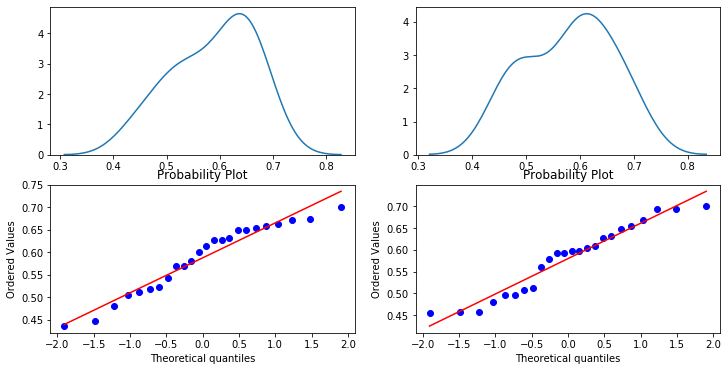

In [44]:
from scipy.stats import probplot

f, axes = plt.subplots(2,2, figsize=(12,6))

sb.distplot(mean_set0, hist=False, ax=axes[0][0])
probplot(mean_set0, plot=axes[1][0])

sb.distplot(mean_set1, hist=False, ax=axes[0][1])
probplot(mean_set1, plot=axes[1][1])

In [45]:
import scipy

In [46]:
print(scipy.stats.shapiro(cr_set0))

(0.8815567493438721, 0.008933120407164097)


In [47]:
print(scipy.stats.shapiro(cr_set1))

(0.9325231909751892, 0.11101386696100235)


In [48]:
print(scipy.stats.bartlett(cr_set0,cr_set1))

BartlettResult(statistic=0.8469915007810215, pvalue=0.3574048231284561)


In [49]:
scipy.stats.wilcoxon(mean_set0, y=mean_set1, zero_method='wilcox',correction=False)

WilcoxonResult(statistic=100.0, pvalue=0.1531274510196695)

In [57]:
import numpy as np
print('글 - 그림 세트의 평균 반응속도: ',np.array(mean_set0).mean())
print('그림 - 글 세트의 평균 반응속도: ',np.array(mean_set1).mean())

글 - 그림 세트의 평균 반응속도:  0.5872735107283166
그림 - 글 세트의 평균 반응속도:  0.5796159929190537


In [58]:
print('글 - 그림 세트의 평균 정답률: ',np.array(cr_set0).mean())
print('그림 - 글 세트의 평균 정답률: ',np.array(cr_set1).mean())

글 - 그림 세트의 평균 정답률:  0.9148924691118948
그림 - 글 세트의 평균 정답률:  0.9102434340988491


In [59]:
scipy.stats.ttest_rel(mean_set0, mean_set1, axis=0, nan_policy='propagate')

Ttest_relResult(statistic=1.4285162849761979, pvalue=0.16658364805923845)